# Importing and getting the DataSet

In [27]:
import tensorflow as tf
from keras import layers
mnist = tf.keras.datasets.mnist # The hand-written digits 0-9, it is a 28x28 image

#unpack the dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#scaling / nurmalizing the data.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Looking at the dataset

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# x=1000
# for i in range(15):
#     plt.subplot(331)
#     plt.imshow(x_train[x],cmap=plt.get_cmap('Blues'))
#     x = x+5
#     plt.show()

# Creating The Model:

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training 

In [29]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test) , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5600 - accuracy: 0.8304 - val_loss: 0.1970 - val_accuracy: 0.9413
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3095 - accuracy: 0.9118 - val_loss: 0.1658 - val_accuracy: 0.9511
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2625 - accuracy: 0.9258 - val_loss: 0.1337 - val_accuracy: 0.9590
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2331 - accuracy: 0.9329 - val_loss: 0.1206 - val_accuracy: 0.9639
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2168 - accuracy: 0.9380 - val_loss: 0.1123 - val_accuracy: 0.9662
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2013 - accuracy: 0.9418 - val_loss: 0.1161 - val_accuracy: 0.9664
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1919 - accuracy: 0.9444 - val_loss: 0.1056 - val_accuracy:

In [31]:
evaluate_loss, evaluate_acc = model.evaluate(x_test, y_test)
print(evaluate_loss, evaluate_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9707
0.1052393689751625 0.9707000255584717


<AxesSubplot:>

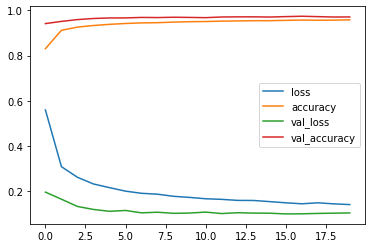

In [32]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [9]:
def eval_metric(model, history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, 20 + 1)
    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()

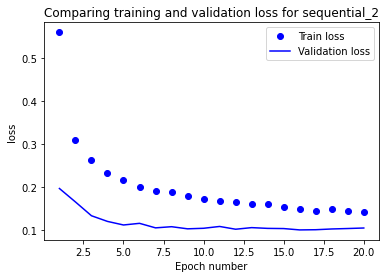

In [33]:
eval_metric(model, history, 'loss')

In [6]:
#To save a model

In [41]:
# model.save('model_with_drop')
# model.save('new_model')

INFO:tensorflow:Assets written to: model_with_drop\assets


In [20]:
#Load a model
new_model = tf.keras.models.load_model('new_model')

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Predicting a 7

it is:


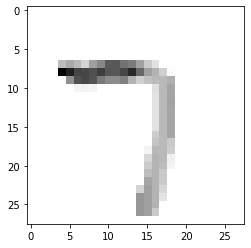

In [255]:
#Prediction
index_from_dataset =585
print(x_test[585])
# print(x_test[66].size)
predict = new_model.predict([x_test])
print("Predicting a" ,np.argmax(predict[index_from_dataset]))
print()
print("it is:")
# print(x_test[index_from_dataset].size)
plt.imshow(x_test[index_from_dataset],cmap=plt.cm.binary)
plt.show()

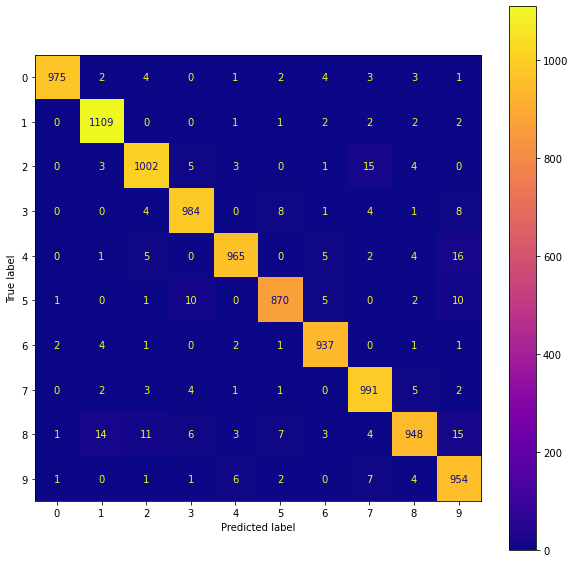

In [22]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,accuracy_score, ConfusionMatrixDisplay
pred = new_model.predict(x_test)
pred = pred.argmax(axis=1)
labels = ["0","1","2","3","4","5","6","7","8","9"]
# Creating Confusion matrix
cm=confusion_matrix(pred ,y_test)
# Ploting Confusion matrix 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'plasma');